# Classify

## check the protect class in protected area and reclassify

/Users/celinathome/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/Users/celinathome/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


[ 0  1  4  5  7 12 14 15 22 97 98 99]


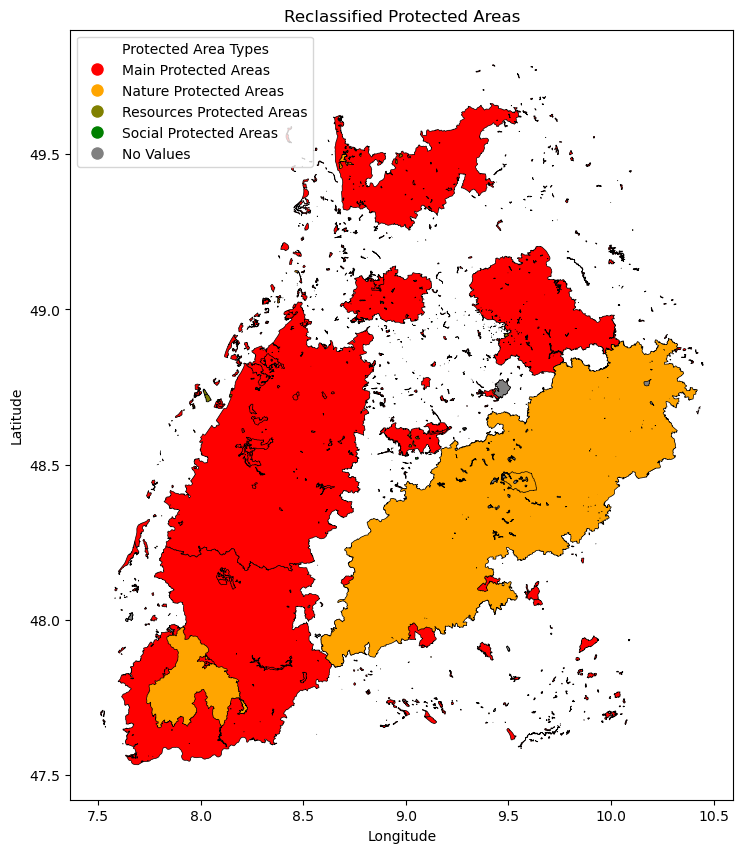

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np

# Read the protected_area.geojson file into a GeoDataFrame
protected_areas = gpd.read_file('../data/output/protected_area.geojson')

# Define replacements for non-numeric values
replacements = {'1a': '1', '1b': '1'}

# Replace non-numeric values in the 'protect_class' column
protected_areas['protect_class'] = protected_areas['protect_class'].replace(replacements)

# Convert the 'protect_class' column to numeric, coercing non-numeric values to NaN
protected_areas['protect_class'] = pd.to_numeric(protected_areas['protect_class'], errors='coerce')

# Fill NaN values with 0
protected_areas['protect_class'] = protected_areas['protect_class'].fillna(0).astype(int)

# Get all distinct entries in the protect_class column
distinct_protect_classes = protected_areas['protect_class'].unique()

# Sort the distinct protect classes in ascending order
distinct_protect_classes_sorted = np.sort(distinct_protect_classes)

# Print the distinct protect classes sorted in ascending order
print(distinct_protect_classes_sorted)

# Define the reclassification rules
def reclassify_protect_class(protect_class):
    if 1 <= protect_class <= 6:
        return 1
    elif protect_class in [7, 97, 98, 99]:
        return 2
    elif protect_class in [12, 14, 15, 19]:
        return 3
    elif protect_class in [21, 22, 24, 27]:
        return 4
    else:
        return 5  # For all other values

# Apply the reclassification function to the 'protect_class' column
protected_areas['reclass_protect_class'] = protected_areas['protect_class'].apply(reclassify_protect_class)

# Define custom class labels
class_labels = {
    1: 'Main Protected Areas',
    2: 'Nature Protected Areas',
    3: 'Resources Protected Areas',
    4: 'Social Protected Areas',
    5: 'No Values'
}

# Define custom colors for each class
class_colors = {
    1: 'red',
    2: 'orange',
    3: 'olive',
    4: 'green',
    5: 'gray'
}

# Plot the reclassified data with custom colors and labels
fig, ax = plt.subplots(figsize=(10, 10))
legend_handles = []
for class_value in sorted(class_labels.keys()):
    class_label = class_labels[class_value]
    class_color = class_colors[class_value]
    class_data = protected_areas[protected_areas['reclass_protect_class'] == class_value]
    class_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=class_color, label=class_label, markersize=10)
    legend_handles.append(class_handle)
    class_data.plot(ax=ax, color=class_color, edgecolor='black', linewidth=0.5)

# Add legend with custom handles
ax.legend(handles=legend_handles, loc='upper left', title='Protected Area Types')

plt.title('Reclassified Protected Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the plot to a file using fig.savefig()
fig.savefig("../plots/protected_area_reclass.png", dpi=300, bbox_inches="tight")

# Save the reclassified data as GeoJSON
protected_areas.to_file("../data/output/protected_area_reclass.geojson", driver='GeoJSON')

## classify isochrones with population in reachibility

### car

### bike
weigh better than car

### pedestrian
weigh better than car

## classify distances to infrastructes

### powerlines

### powerplants
weighed after source

### telecom

### water
weighed after area for cooling

In [9]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

# Load water_area.geojson
water_area = gpd.read_file('../data/output/water_area.geojson')

# Load centroids.geojson (powerline_distance.geojson)
centroids = gpd.read_file('../data/output/powerline_distance.geojson')

# Create spatial index for centroids
centroids_sindex = centroids.sindex

# Calculate distances
distances = []
for water_geom in water_area.geometry:
    # Get the centroid of the bounding box of water_geom
    bbox_centroid = Point(water_geom.bounds[0] + (water_geom.bounds[2] - water_geom.bounds[0]) / 2,
                          water_geom.bounds[1] + (water_geom.bounds[3] - water_geom.bounds[1]) / 2)
    # Find the nearest centroid to the bbox_centroid
    nearest_index = list(centroids_sindex.nearest(bbox_centroid))
    # Get the actual centroid geometry
    nearest_point = centroids.geometry.iloc[nearest_index[0]]
    # Calculate distance
    distance = water_geom.distance(nearest_point)
    distances.append(distance)

# Add distances to water_area.geojson
water_area['distance_to_centroid'] = distances

# Merge columns
merged_data = water_area.merge(centroids[['area', 'water']], left_index=True, right_index=True)

# Save to a new GeoJSON file
merged_data.to_file('../data/output/water_distance2.geojson', driver='GeoJSON')


/Users/celinathome/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/Users/celinathome/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


KeyError: "None of [Index(['area', 'water'], dtype='object')] are in the [columns]"